<a href="https://colab.research.google.com/github/lebe1/ClimateChangeAI/blob/main/Random-Forest-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1 - Modeling

In [2]:
# Import data
df_train = pd.read_csv('scaled_train.csv', sep=';')
df_test = pd.read_csv('scaled_test.csv', sep=';')

In [ ]:
# Define x_train and y_train
x_train = df_train.drop(['prec'], axis=1)
y_train = df_train['prec']

# Remove first row of y_train
y_train = y_train[1:]

# Remove last row of x_train
x_train = x_train[:-1]

# Define x_test and y_test
x_test = df_test.drop(['prec'], axis=1)
y_test = df_test['prec']

# Remove first row of y_test
y_test = y_test[1:]

# Remove last row of x_test
x_test = x_test[:-1]

In [ ]:
# Use standard random forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Create the model with 100 trees
model = RandomForestRegressor(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')

# Fit on training data
model.fit(df_train.drop('prec', axis=1), df_train['prec'])

# Actual class predictions
rf_predictions = model.predict(df_test.drop('prec', axis=1))

Mean squared error: 0.55
Variance score: 0.70


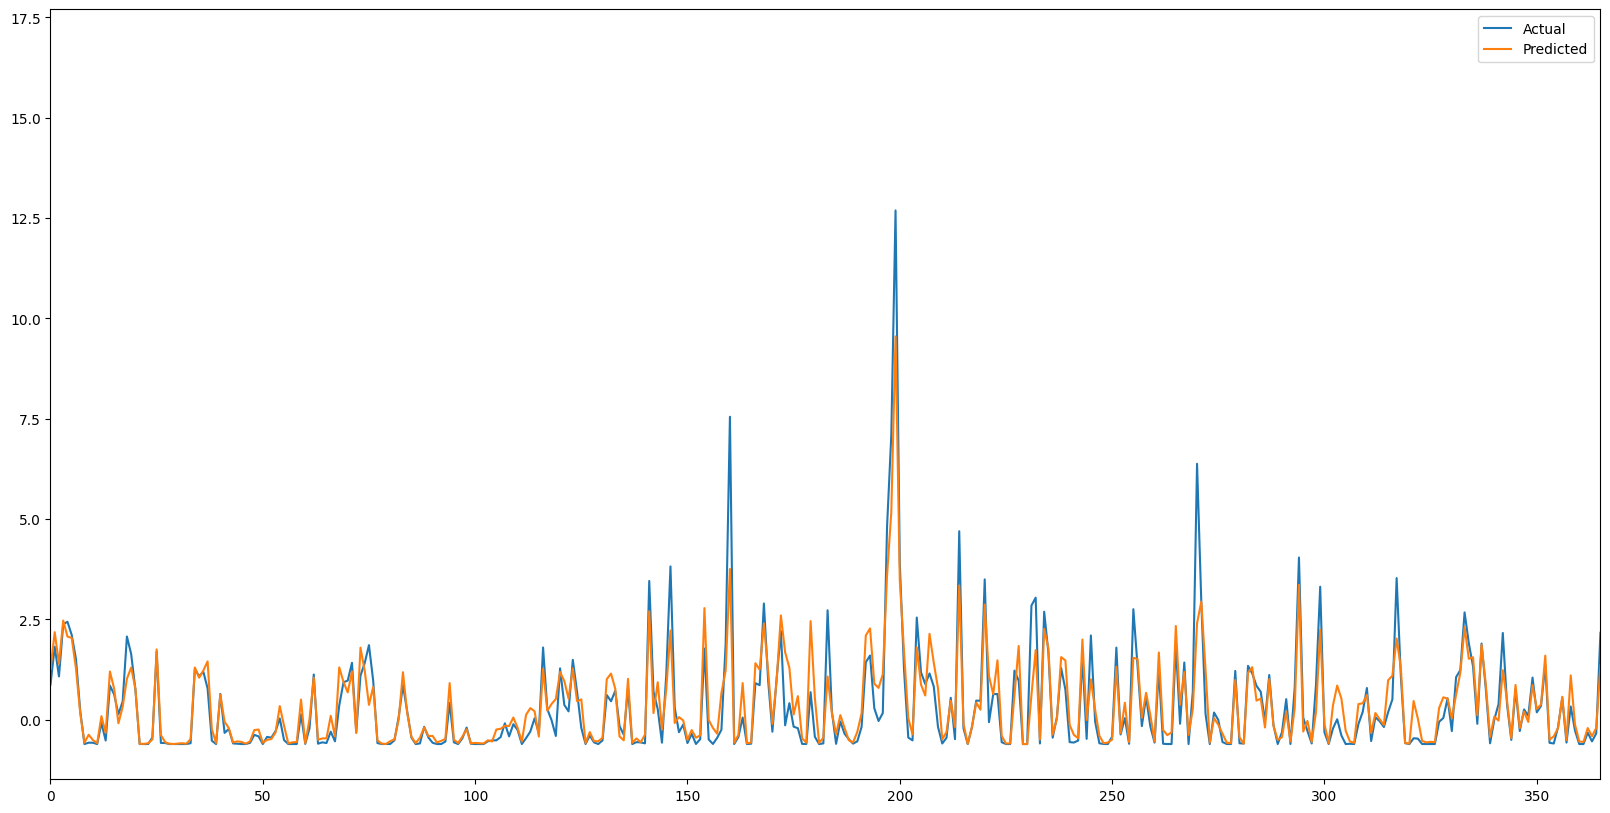

In [5]:

# The root mean squared error (RMSE), parameter squared=False gives the RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(df_test['prec'], rf_predictions, squared=False))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_test['prec'], rf_predictions))

# Plot predictions in time series plot compared to actual values
plt.figure(figsize=(20, 10))
plt.plot(df_test['prec'], label='Actual')
plt.plot(rf_predictions, label='Predicted')

# Only plot the first year
plt.xlim(0, 365)

plt.legend()

# Step 2 - Feature importance

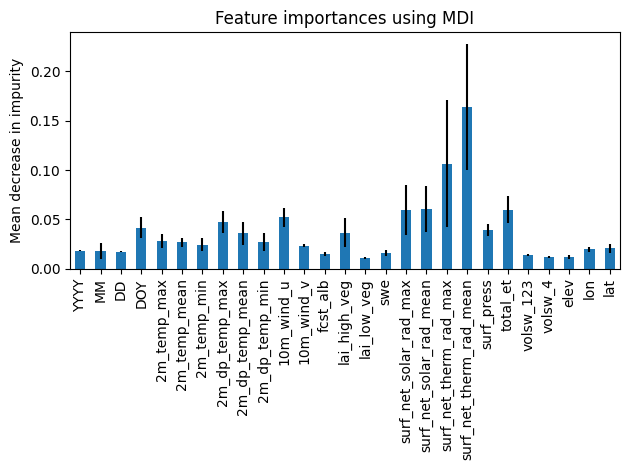

In [8]:
# Get numerical feature importances
importances = model.feature_importances_

# Plot feature importances
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df_train.drop('prec', axis=1).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Gini Importance / Mean Decrease in Impurity (MDI)")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(model, df_test.drop('prec', axis=1), df_test['prec'], n_repeats=5, n_jobs=-1,random_state=42)

# Sort the indices of the permutation importance values
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation importance values
plt.figure(figsize=(20, 10))
plt.barh(df_test.drop('prec', axis=1).columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Add the column names to the plot
plt.yticks(ticks=range(len(df_test.drop('prec', axis=1).columns)), labels=df_test.drop('prec', axis=1).columns[sorted_idx])
plt.show()
